In [294]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import sys

sys.path.append("../../")

import pingparser.swm.touch as touchparse
import pingparser.general as genparse
import pyfun.bamboo as boo


import importlib
importlib.reload(touchparse)
importlib.reload(genparse)

<module 'pingparser.general' from 'D:\\clamlab\\pingparser\\sandbox\\../..\\pingparser\\general.py'>

In [266]:
import glob, os
data_root = "Y:\\Edmund\\Data\\foo"
data_all = {} #container for all rats


rats = ['LP01', 'LP02', 'LP03', 'LP04']

for rat in rats:

    rat_root = os.path.join(data_root, rat)
    files = glob.glob(os.path.join(rat_root, '*.csv'))
    
    rat_df = pd.DataFrame([], columns=touchparse.COLNAMES) #init one rat big df

    for i, fn in enumerate(files):
        raw_df = genparse.read_raw(fn)
        df_sess=genparse.sess_summary(raw_df, i, touchparse.COLNAMES, touchparse.trial_summary)
        rat_df = pd.concat([rat_df, df_sess], axis=0, ignore_index=True)
        
    data_all[rat] = rat_df

multiple found
multiple found
multiple found
multiple found
multiple found
multiple found
multiple found
multiple found
multiple found
multiple found
multiple found
multiple found
multiple found
multiple found
multiple found
multiple found
multiple found
multiple found
multiple found
multiple found
multiple found
multiple found
multiple found
multiple found
multiple found
multiple found
multiple found
multiple found
multiple found
multiple found
multiple found
multiple found
multiple found
multiple found
multiple found
multiple found
multiple found
multiple found
multiple found
multiple found
multiple found
multiple found
multiple found
multiple found
multiple found
multiple found
multiple found
multiple found
multiple found
multiple found
multiple found
multiple found
multiple found
multiple found
multiple found
multiple found
multiple found
multiple found
multiple found
multiple found
multiple found
multiple found
multiple found
multiple found
multiple found
multiple found
multiple f

multiple found
multiple found


In [ ]:
data2_all = {}


for rat_id, rat_df in data_all.items():
    data2_all[rat_id] = boo.slice(rat_df, {'Cue_D':[0.25]}, '+')

In [373]:
rat_df['sess'].unique()

array([0., 1., 2., 3., 4.])

<ErrorbarContainer object of 3 artists>

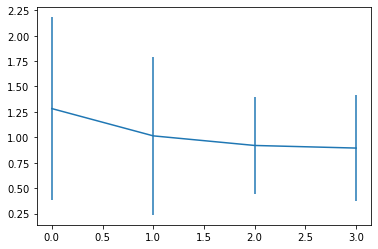

In [370]:
perf_by_sess = {}
chunk_i = 0
binsize=50
for sess_id, sess_df in rat_df.groupby('sess'):
    df_splits = np.array_split(sess_df, len(sess_df)/binsize)
    
    
    sess_M = []
    sess_SD = []
    sess_i = []
    for chunk in df_splits:
        M = chunk['RespError_cuefrac'].mean()
        SD = chunk['RespError_cuefrac'].std()
        
        sess_i.append(chunk_i)
        sess_M.append(M)
        sess_SD.append(SD)
        chunk_i+=1
        
    perf_by_sess[sess_id] = [sess_i,sess_M, sess_SD]
        
fig, ax = plt.subplots()

ax.errorbar(perf_by_sess[0.0][0], perf_by_sess[0.0][1], yerr = perf_by_sess[0.0][2])

<ErrorbarContainer object of 3 artists>

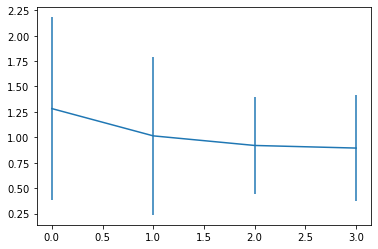

In [316]:
data2_all['LP01']

,TrialNum,FixationDur,RespError_cuefrac,Cue_D,CueRel1_x,CueRel1_y,CueRel2_x,CueRel2_y,Cue1_x,Cue1_y,Cue2_x,Cue2_y,anchor1_x,anchor1_y,anchor2_x,anchor2_y,sess
24,25,0.316697,0.852842,0.25,0.354574,-0.185141,0.354574,-0.185141,0.706894,-0.635141,0.706894,-0.635141,0.352320,-0.45,0.352320,-0.45,0.0
25,26,0.331642,0.726079,0.25,0.385809,-0.105600,0.385809,-0.105600,0.645038,-0.555600,0.645038,-0.555600,0.259229,-0.45,0.259229,-0.45,0.0
26,27,0.347292,0.990449,0.25,0.090198,-0.389698,0.090198,-0.389698,0.682477,-0.839698,0.682477,-0.839698,0.592278,-0.45,0.592278,-0.45,0.0
27,28,0.363681,0.849628,0.25,-0.216790,0.336158,-0.216790,0.336158,-0.912601,-0.113842,-0.912601,-0.113842,-0.695811,-0.45,-0.695811,-0.45,0.0
28,29,0.380844,0.837380,0.25,0.110856,0.384332,0.110856,0.384332,0.705276,-0.065668,0.705276,-0.065668,0.594420,-0.45,0.594420,-0.45,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1226,180,2.000000,1.315920,0.25,0.123544,-0.380443,0.123544,-0.380443,0.441195,-0.830443,0.441195,-0.830443,0.317651,-0.45,0.317651,-0.45,4.0
1227,181,2.000000,1.239317,0.25,-0.124199,0.380230,-0.124199,0.380230,0.222249,-0.069770,0.222249,-0.069770,0.346448,-0.45,0.346448,-0.45,4.0
1228,182,4.000000,0.843817,0.25,-0.175704,0.359344,-0.175704,0.359344,0.401683,-0.090656,0.401683,-0.090656,0.577387,-0.45,0.577387,-0.45,4.0
1229,183,1.000000,1.838651,0.25,0.105874,0.385734,0.105874,0.385734,-0.527989,-0.064266,-0.527989,-0.064266,-0.633863,-0.45,-0.633863,-0.45,4.0


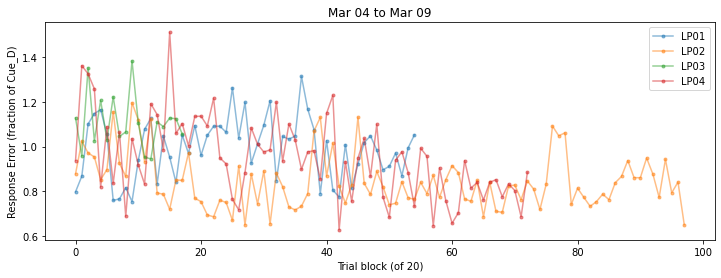

In [315]:
binsize = 20

fig, ax = plt.subplots(figsize=(12,4))
for rat_id, rat_df in data2_all.items():

    resperr = np.array(rat_df['RespError_cuefrac'].tolist())

    n = int(np.floor(len(resperr)/binsize))
    resp2 = np.array_split(resperr, n)
    banana = [np.mean(f) for f in resp2]

    ax.plot(banana, marker='.', label=rat_id, alpha=0.5)
    
ax.legend()

ax.set_ylabel('Response Error (fraction of Cue_D)')
ax.set_xlabel('Trial block (of ' + str(binsize) + ')')
ax.set_title("Mar 04 to Mar 09")
fig.savefig('foo.pdf')